# 7-3 아달라인과 경사하강법

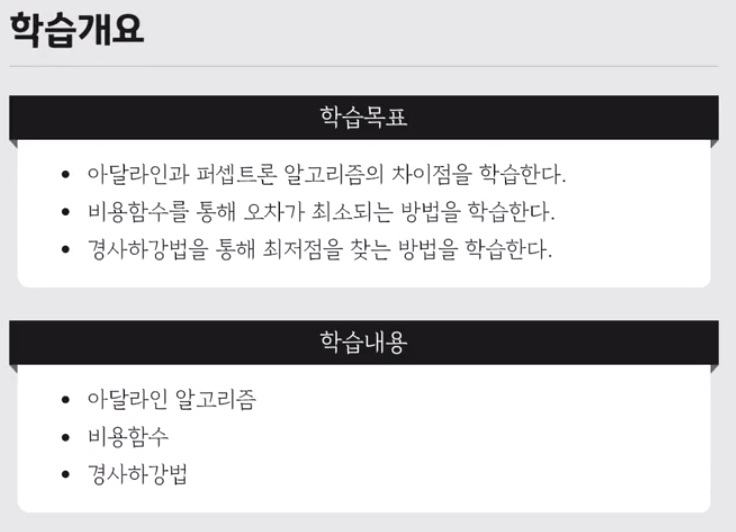

퍼셉트론보다 좀 더 향상된 아달라인 알고리즘에 대해 배운다.

## 2. 아달라인과 퍼셉트론 비교

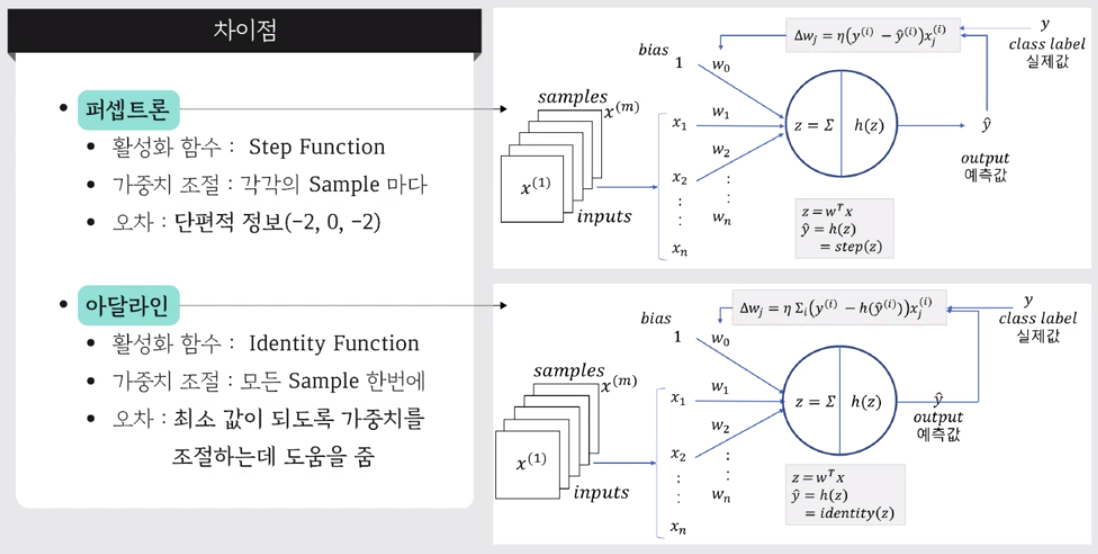

두 알고리즘의 전반적인 흐름은 아주 동일하다.  
입력값과 가중치를 곱해서 순입력 Z에 저장하고 이를 활성화 함수에 넣어 예측값을 바탕으로 실제값과 비교해서 가중치를 새롭게 조정해 나간다.

그렇다면 다른 점은  
1. ***활성화 함수  ***  
    퍼셉트론은 계단함수를 사용하고,  
    아달라인은 **identity 함수**를 사용한다. 
    
    > identity 함수란, 함수에 넣어준 값을 그대로 반환해주는 함수이다.  
    
    따라서 퍼셉트론은 y와 y_hat을 비교하면서, 오차가 2, 0, -2 로 세 종류가 있었는데  
    **아달라인에서는 오차가 3개가 아니라, 모든 실수 값이 될 수 있다.**
    
    
2. ***가중치 조정***  
    퍼셉트론은 샘플마다 계속해서 가중치를 변경해주는 데 반해서,  
    **아달라인에서는 모든 샘플에 대한 오차를 측정한 다음에 한꺼번에 가중치를 조정한다.**
    
아달라인에서는 오차값이 다양하다고 했는데, 꽤 중요한 부분이다.  

퍼셉트론에서는 단지 학습을 잘 했다, 못 했다는 것만 알 수 있었지만  
아달라인에서는 오차의 정도, 오차의 크기를 알 수 있다.  

그래서 아달라인은 이 오차가 가장 작게 나오는 방향으로 가중치를 계속 조정해 갈 수 있다는 것이 좀 더 다르다.  
이 점이 훨씬 더 효율적이라고 말할 수 있다.

## 3. 비용함수 : 최소 제곱법(SSE) 개념 설명

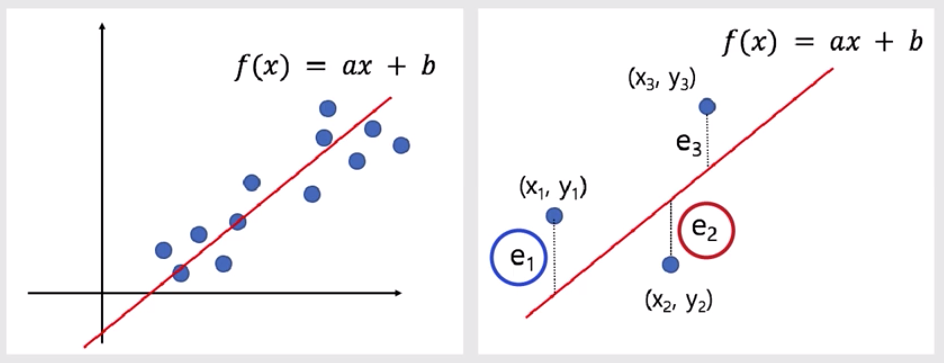

아달라인에서는 y_hat과 y의 차이, 즉 오차가 최소가 되도록 비용함수라는 것을 이용해서 가중치를 조정한다.  
비용함수는 최소 제곱법으로 나타낼 수 있는데, 최소 제곱법이 뭔지 알아보자.  

예를 들어, 위의 그림과 같이 파란 점들이 그려진 자료가 있다고 가정하자.  
파란 점들의 경향성을 가장 잘 설명하는 식은 아마도 빨간색 직선일 것이다.  
이렇게 오차가 가장 작은 빨간색 직선을 찾아내는 가장 적합한 방법이 바로 **최소 제곱법 또는 최소 자승법**이라고 한다.

오른쪽 그림에서 점선으로 표시된 e_i 는 파란 점과 빨간 직선의 y축 상의 거리 차이를 의미한다.  
자료와 직선 사이의 오차가 작다는 것은 오차 값이 e_1 + e_1 + ... 이런 것들을 모두 다 더한 값이 작다는 것을 의미한다.  

그런데 그림에서 쉽게 볼 수 있는 듯이 e_1의 경우 거리의 값이 양수가 나오지만, e_2의 경우 음수가 나온다.  
이런 값들을 다  더하면, 오차를 제대로 구할 수 없으니, 제곱한 값을 사용하게 되는 것이다.

그럼 절대값을 사용하면 되지 않냐라는 질문이 있을 수 있는데,  
절대값을 쓰지 않는 이유는 특정 지점에서 미분이 불가능하기도 하고, 계산하는데 불편하기 때문이다.


## 3. 비용함수

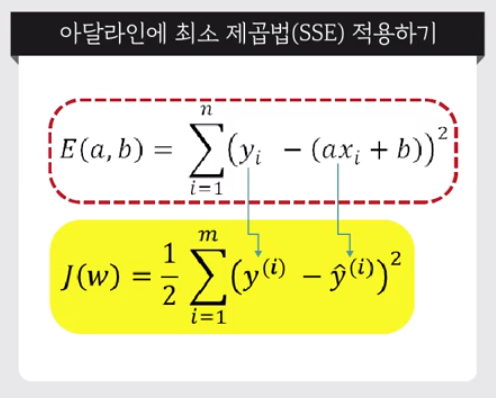

위의 식이 최소 제곱법을 나타내는 일반적인 형태이다.  
이 식을 비용함수(cost function) 혹은 손실함수(loss function)이라고 한다.  

우리는 비용함수 E를 가장 작게 하는 a와 b의 값을 구하면 도니다.

비용함수 E(a, b) 식에서  
y값을 클래스 레이블로 정의하고, ax + b를 예측값 , 즉 y_hat으로 정의하면 바로 아달라인 비용함수가 되는 것이다.  

> 여기서 알아야할 것은  
> 비용함수 J(w)는 학습을 반복할 때 마다 식이 달라진다는 것이다.



## 4. 최소제곱법을 활용한 비용함수

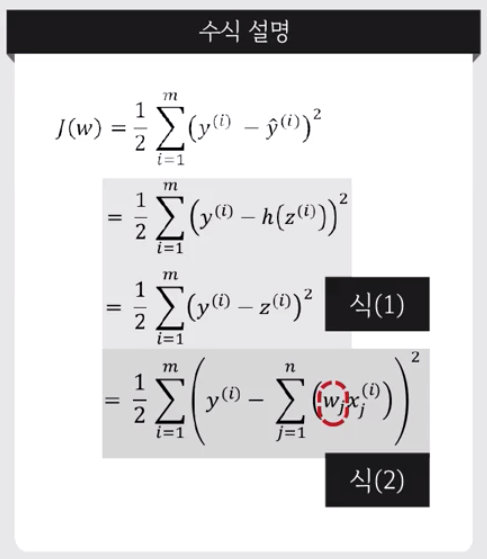

숫자 1/2은 비용함수를 미분했을 때, 미분 값이 복잡하지 않기 위해 그냥 곱한 상수 값이다.  
미분 결과에 별로 영향을 끼치지 않기 때문에 그냥 걱정하지 않아도 괜찮다.  

아달라인과 퍼셉트론의 차이점 2번째가,  
아달라인은 퍼셉트론과 다르게 한번에 샘플들을 처리한다고 했다.  

> line 1

그래서 샘플들의 오차를 한 번에 계산할 수 있게 시그마를 취했다.  
그래서 여기 m은 샘플들의 총 개수이다.

n은 입력 데이터의 크기를 말한다.

시그마 안에 식을 살펴보면 y_i는 i 번째 샘플의 클래스 레이블이고, 이 값은 이미 주어진 값이다.  
y_hat_i는 i 번째 샘플에 대해서, 아달라인이 예측한 값이다.

> line 2, 3 

y_hat_i를 좀 더 상세히 표현하면  식(1)과 같다.  
y_hat 값을 출력층 뉴런의 입력과 출력으로 나타낸 것이다.  
그런데, 아달라인의 활성화 함수 h(z)는 identity 함수이기 때문에  
**h(z)는 순입력 z가 된다.**, 같은 값 말이다.  

> line 4

z를 시그마로 표현하면 식(2)에 있는 것처럼 나타낼 수 있다.  
입력 특성의 개수가 n개이니까, 시그마 n이 된 것이다.  

w_j는 가중치이다.  
w_j가 매 학습을 반복할 때마다 변하게 되기 때문에, 전체식이 자꾸 변한다.  

따라서 가중치에 영향을 받는 비용함수 또한 매 반복마다 식이 달라진다고 말하는 것이다.


#### 비용함수는 매 epochs 마다 달라진다는 사실을 잊어버리지 말자

자 그러면, 학습을 반복할 때마다 이 달라지는 비용함수 J를 어떻게 하면  
이 비용함수를 최소로 하는 w를 찾느냐 하는 것이 우리의 문제이다.



## 4. 최소 제곱법을 활용한 비용함수

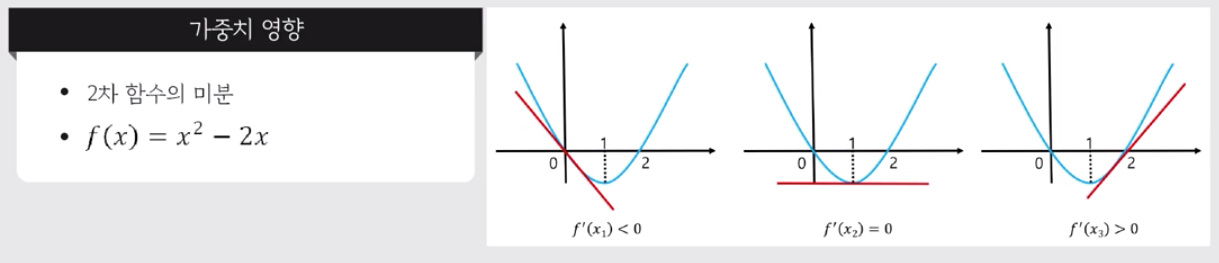

바로 미분을 이용하는 것이다.  
함수 J(w)를 w에 대해 미분하면, J(w)를 최소로 하는 w값을 찾을 수 있다.  
w는 바로 가중치 값이니 꼭 잊지 말자.

주어진 식을 미분하여 기울기에 대한 식을 구한 후에 기울기가 0인 곳을 찾는 것이다.  
그러면 비용함수도 그냥 미분해서 기울기가 0인 값을 찾으면 되지 않냐? 라고 물어볼 수 있지만, 
**우리가 사용하는 비용함수를 그럴 수가 없다.**

왜일까?

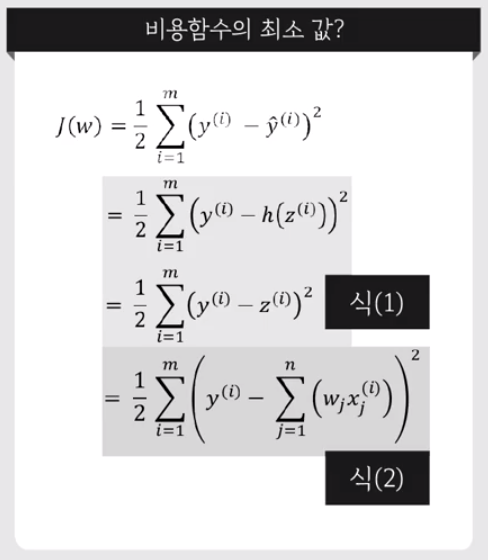

여기 보이는 비용함수 식은 단지 1회 반복하는 비용함수이다.

매번 학습을 반복할 때마다 비용함수는 변하는데, 가중치 w가 계속 조정되기 때문이다.

우리가 찾고 싶은 새 비용함수를 최소로 하는 가중치 w를 찾고 싶은 것이다.

한 번 반복할 때, 그 전에 비용함수를 최소로 하는 가중치 w를 찾는 것이 아니라  
새로 생긴 그러한 비용함수의 최소값을 찾는 것이다.

## 5. 경사하강법

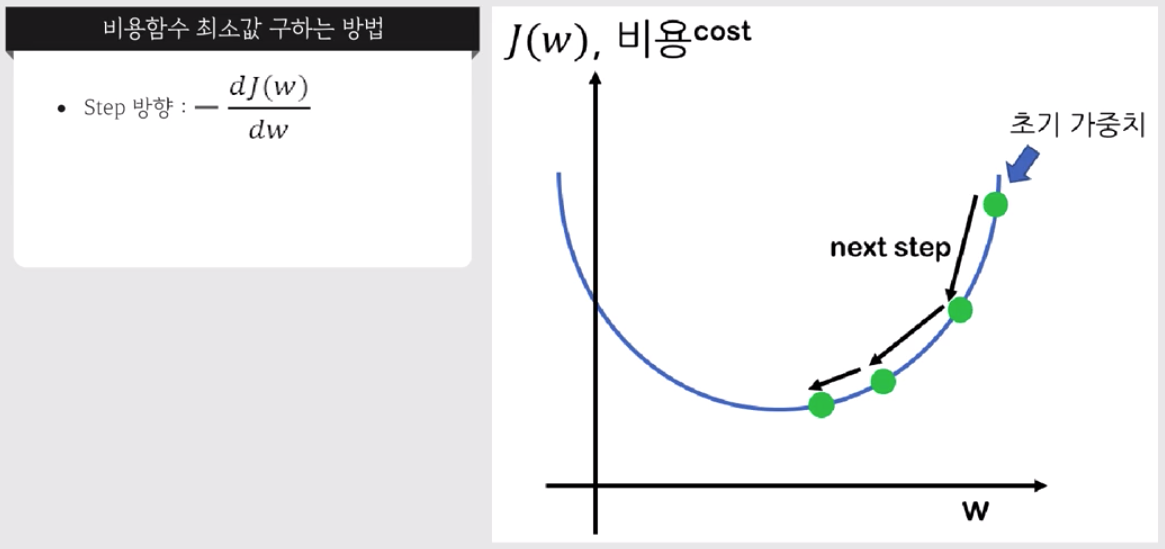

경사하강법,   
이 그림에서 주의할 점은 그림의 파란색 실선은 절대 미리 알 수 없다.  
왜냐하면 비용함수는 매번 반복 때마다 변하기 때문이다.  

우리가 바라는 것은 이 그림의 초록색 점들처럼 낮은 곳으로 점점 내려 가기를 원한다는 것이다.
초기 가중치에서 계속 왼쪽으로 가다 보면, 결국 비용함수를 최소로 하는 곳에 도달하게 된다.  

그러면 어떻게 최소점을 향해 움직일 수 있을까?  

일단, 우리는 특정한 한 epoch에서는 가중치 w에 대한 비용함수의 미분값은 구할 수 있다.  
이 미분값의 반대방향으로 움직이면 최소점의 방향으로 움직이게 된다.  
=> 가중치에 대한 비용함수의 변화율이 만약 양수라면, 현재 가중치 w를 더 작게 해야 비용함수 값이 작아진다는 것이다.  
=> 만약 음수라면, 현재 가중치 w를 더 크게 해야 비용함수 값이 감소한다는 것을 의미한다.

따라서 우리는 비용함수 미분 값이 줄어드는 방향으로 계속 움직이면 되는 것이다.

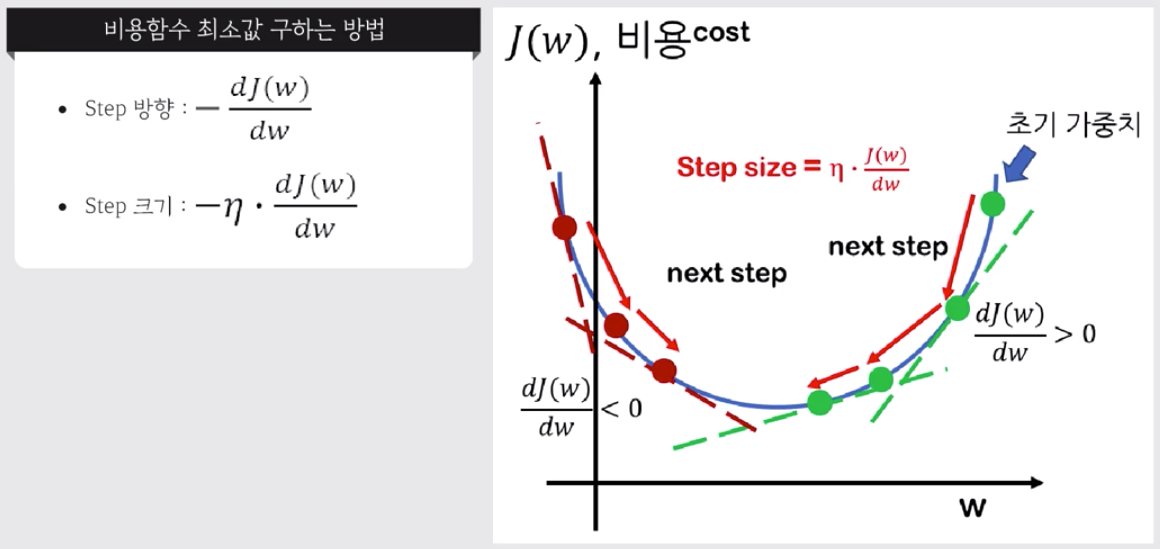

얼마나 내려갈 지를 ***스텝 사이즈***라고 부르고, 다른 말로는 ***델타 w***로 표시할 수 있다.  

이 스텝의 크기는 학습률 에타와 비용함수의 미분값을 곱한만큼 움직이게 된다.  
학습률 에타 값을 곱해주기 때문에, 에타값이 작으면 느리게 움직이고, 크면 클수록 빨리 움직이게 된다.

그러나 학습률이 너무 작아서도 안되고, 너무 커도 안된다...